# Assignmnet 1 (100 points)

**Name:** Shayvee Divyata Nathoo <br> 
**Email:** shn0566@thi.de<br>
**Group:** B <br>
**Hours spend *(optional)* :** <br>

### Question 1: Zipf’s law *(20 points)*

<p>Verify Zipf’s law on a textual corpus. The jungle book dataset is provided in the "Datasets and Resources" file. (You can also use any other dataset of your choice). <p>

<p> Provide a list of unique word sorted by their frequency in descending order. Also, give a brief discussion of the findings. You can use matplotlib library to plot the linear curve, and a log-log curve. The usage of other python modules is not permitted.</p>

the 3696
and 2321
of 1347
to 1262
a 1147
he 1074
in 742
that 665
his 659
i 587
was 534
for 463
is 460
said 442
with 431
as 422


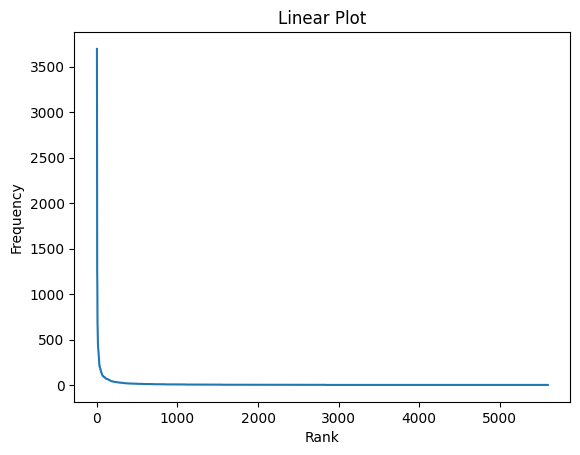

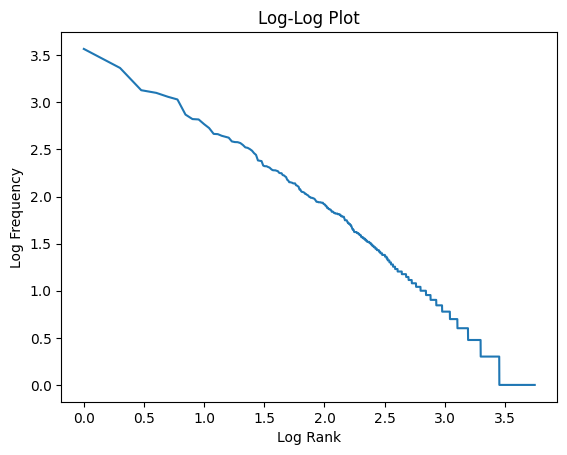

'Zipfs law states that the frequency of a word is inversely proportional to its rank. on the linear curve we can see that the freq of words \ndecreases rapidly as we move down the rank, though it is not linear due to the presence of some very high-frequency words in the beginning.\non the other hand, the log curve shows the correlation b/w rank and frequency more clearly. we get an almost straight line with some anomalies\nhere and there, but this indicates thaat Zipfs law holds true. In most corpus, it might not be fully straight due to various reasons such as \nstop words, dataset size and punctuations'

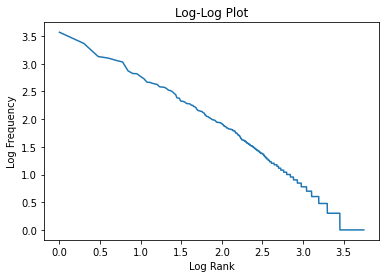

In [3]:
with open('jungle_book.txt', 'r') as file:
    corpus = file.read() 
#print(corpus)

punct_marks = ['.', ',', '!', '?', ';', ':', '"', '-', '_' ]
for punctuation in punct_marks:
    corpus = corpus.replace(punctuation, '')

symbols_used= [ '*', '#', '/',  '\'', '%', '[', ']', '(', ')', '&', '@' ]
for symbols in symbols_used: 
    corpus= corpus.replace(symbols, '')

corpus = corpus.lower()  
words = corpus.split()  

words = [word for word in words if not any(char.isdigit() for char in word)]

word_freq = {}
for word in words:
    if word not in word_freq:
        word_freq[word] = 0
    word_freq[word] += 1

sorted_words = sorted(word_freq.keys(), key=lambda x: word_freq[x], reverse=True)

for word in sorted_words:
    print(word, word_freq[word])

import matplotlib.pyplot as plt
import numpy as np

frequencies = [word_freq[word] for word in sorted_words]

ranks = range(1, len(sorted_words) + 1)

plt.plot(ranks, frequencies)
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title('Linear Plot')
plt.show()

plt.plot(np.log10(ranks), np.log10(frequencies))
plt.xlabel('Log Rank')
plt.ylabel('Log Frequency')
plt.title('Log-Log Plot')
plt.show()


#BRIEF DISCUSSION 
'''Zipfs law states that the frequency of a word is inversely proportional to its rank. on the linear curve we can see that the freq of words 
decreases rapidly as we move down the rank, though it is not linear due to the presence of some very high-frequency words in the beginning.
on the other hand, the log curve shows the correlation b/w rank and frequency more clearly. we get an almost straight line with some anomalies
here and there, but this indicates thaat Zipfs law holds true. In most corpus, it might not be fully straight due to various reasons such as 
stop words, dataset size and punctuations'''


### Question 2: Mutual Information *(30 points)*

<p>Pointwise mutual information quantifies the statistical dependence between events ${x_{t} = w_{1} }$ and ${ x_{t+1} = w_{2}}$. ${C(w)}$ is the absolute frequency and ${N}$ is the size of the corpus. If the probability of the next word in the corpus (${w_{2}}$) is affected by the probability of the previous word (${w_{1}}$), then ${pmi(w_{1},w_{2}) = 0}$; else the pmi value is either positive or negative. </p>

$$ pmi(w_{1},w_{2}) = log \frac{P(x_{t} = w_{1}, x_{t+1} = w_{2})} {P(x_{t} = w_{1}) . P(x_{t+1} = w_{2})} \approx log \frac {C(w_{1}w_{2}) . N} {C(w_{1}) . C(w_{2})}  $$

<p>Calculate the Pointwise mutual information (PMI) for all successive word pairs (w1, w2) in the jungle book corpus. Words (not word pairs) that occur in the corpus less than 10 times should be ignored. List the 30 word pairs with the highest pmi value and the 30 word pairs with the lowest pmi value. Document your observations and discuss the validity of the independence assumption for unigram models. If needed, you can use nltk library. </p>

In [4]:
import nltk
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
import math
import matplotlib.pyplot as plt


with open('jungle_book.txt', 'r') as file:
    corpus = file.read() 

# Tokenize 
punct_marks = ['.', ',', '!', '?', ';', ':', '"', '-', '_' ]
for punctuation in punct_marks:
    corpus = corpus.replace(punctuation, '')

symbols_used= [ '*', '#', '/',  '\'', '%', '[', ']', '(', ')', '&', '@' ]
for symbols in symbols_used: 
    corpus= corpus.replace(symbols, '')

corpus = corpus.lower()  
tokens = corpus.split()  

tokens= [token for token in tokens if not any(char.isdigit() for char in token)] 

# word freq
word_freq = FreqDist(tokens)

# word freq>10
word_freq_10 = {word: freq for word, freq in word_freq.items() if freq >= 10}

#pairss
word_pairs = []
for i in range(len(tokens) - 1):
    if tokens[i] in word_freq_10 and tokens[i+1] in word_freq_10:
        word_pairs.append((tokens[i], tokens[i+1]))

#PMI/pair
pmi_values = {}
for w1, w2 in word_pairs:
    p_x1_x2 = word_pairs.count((w1, w2)) / len(word_pairs)
    p_x1 = word_freq_10[w1] / len(tokens)
    p_x2 = word_freq_10[w2] / len(tokens)
    pmi = math.log2(p_x1_x2 / (p_x1 * p_x2))
    pmi_values[(w1, w2)] = pmi

# Sorted PMI/pair
sorted_pmi = sorted(pmi_values.items(), key=lambda x: x[1], reverse=True)

# 30 highest PMI
print("highest PMI:")
for pair, pmi in sorted_pmi[:30]:
    print(pair, pmi)
    
#30 lowest PMI
print("\nlowest PMI:")
for pair, pmi in sorted_pmi[-30:]:
    print(pair, pmi)


#graph for PMI distr for documentation 
pmi_list = [pmi for _, pmi in sorted_pmi]
plt.hist(pmi_list, bins=50, color="pink", range=(-10, 10))
plt.title("Distribution of PMI values")
plt.xlabel("PMI values")
plt.ylabel("Frequency")
plt.show()

print(len(tokens))
#OBSERVATIONS AND DISCUSSIONS
'''1) word pairs with highest PMIs indicate strong dependency between the two words in the corpus, which might mean that they are common 
phrases, or compound words ect. The opposite happens for lowest PMI where these word pairs may be unrelated or infrequent combinations.
2)  if the PMI values are mostly around 0 then in the independence assumption holds true. However if there is a sig num of of high or low 
PMI values, it indicates the presence of dependencies b/w words, which goes against the independence assumption for unigram models.
3) important note: PMI doesnt capture semantic relationships b/w words and is oly based on stats of the word pairs occurence. '''

KeyboardInterrupt: 

### Question 3: Wikipedia language model *(50 points)*

<p> A customer of yours is dissatisfied with the quality of the speech recognition. After a conversation with the customer, you find out that he dictates books. The initial investigations on a book excerpt have shown that the language model used is not suitable. For building a better language model for the application, you have asked your customer to provide a text from the book (see "Datasets and Resources") </p>

<p> In order to save costs and also to avoid problems with copyrights, your company has decided not to use existing solutions for this project. So, you have to implement a 2-gram language model in Python from scratch. Include a short description of the data preprocessing steps, method, experiment design, hyper-parameters, and evaluation metric. Also, document your findings, drawbacks, and potential improvements. Finally, compare the performance of the language model with and without Backoff.</p>

<p> You cannot use any Python libraries like NLTK. If you need to use special Python modules, you can discuss with your instructor before submission. </p>

<h4> Datasets and Resources </h4> 

* WikiText-2 (raw/unprocessed), Train, Dev, Test

In [24]:
import math

with open("wiki.train.raw", "r") as file: 
     train= file.read()

with open("wiki.test.raw", "r") as file: 
    test= file.read()
with open("wiki.valid.raw", "r") as file: 
    valid= file.read()


def prep_text(text):
    word = ""
    tokens = []
    for i in range(len(text)):
        if text[i].isalpha():
            word += text[i].lower()
        elif word:
            tokens.append(word)
            word = ""
    if word:
        tokens.append(word)
    return tokens

def bigram(tokens, n):
    ngrams = {}
    for i in range(len(tokens)-1): 
        current_token= tokens[i]
        next_token= tokens[i+1]

        if current_token not in ngrams: 
            ngrams[current_token]= {'int_count': 1}
        ngrams[current_token]['int_count'] += 1

        if next_token not in ngrams[current_token]: 
            ngrams[current_token][next_token] = 1
        ngrams[current_token][next_token] += 1

    return ngrams

def probability(ngrams):
    probabilities = {}
    for ngram, following_words in ngrams.items():
        counts = {}
        total_count = 0
        for word in following_words:
            if word not in counts:
                counts[word] = 0
            counts[word] += 1
            total_count += 1
        probabilities[ngram] = {word: count/total_count for word, count in counts.items()}
    return probabilities

def generate_sentence(probabilities, start_word, max_length):
    sentence = [start_word]
    current_token= start_word
    for _ in range(max_length):
        if current_token not in probabilities:
            break
        next_word = random.choices(list(probabilities[current_token].keys()),
                                   list(probabilities[current_token].values()))[0]
        sentence.append(next_token)
        current_token= ' '.join(sentence[-2:])
    return ' '.join(sentence)

def perplexity(probabilities, tokens):
    total_log_prob = 0
    word_count = 0
    for i in range(1, len(tokens)):
        current_token= tokens[i-1]
        next_token = tokens[i]
        if current_token in probabilities:
            if current_token in probabilities[current_token]:
                prob = probabilities[current_token][next_token]
                total_log_prob += math.log2(prob)
                word_count += 1
    




with open('jungle_book.txt', 'r') as file:
    text = file.read() 
tokens = prep_text(text)

ngrams = bigram(tokens, 2)

probabilities = probability(ngrams)

text_perplexity = perplexity(probabilities, tokens)

print("Perplexity: ", perplexity)

start_word = "the"
max_length = 10
#sentence = generate_sentence(probabilities, start_word, max_length)

#print(sentence)
#probability(ngrams)
#ngrams

Perplexity:  <function perplexity at 0x7feb02f003a0>


### Additional Experiments *(5 additional points - <span style="color: red;">Optional</span>)*